#Code by Joshua Nichols - 041021

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Install surprise

In [ ]:
try:
  import surprise
except:
  !pip install surprise

  Using cached https://files.pythonhosted.org/packages/61/de/e5cba8682201fcf9c3719a6fdda95693468ed061945493dea2dd37c5618b/surprise-0.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/97/37/5d334adaf5ddd65da99fc65f6507e0e4599d092ba048f4302fe8775619e8/scikit-surprise-1.1.1.tar.gz
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617552 sha256=6d8fd8909343ce4deea78c66a4fbd3018ca98a2a68bab86d53c17d9290d119c0
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


**Load the data from ratings_small.csv**

In [ ]:
location = '/content/drive/My Drive/Colab Notebooks/input/'
assignment = '5610_HW_5'

data = pd.read_csv(location + assignment + '/ratings_small.csv')

Examine the data

In [ ]:
data.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [ ]:
data['rating'].value_counts()

4.0    28750
3.0    20064
5.0    15095
3.5    10538
4.5     7723
2.0     7271
2.5     4449
1.0     3326
1.5     1687
0.5     1101
Name: rating, dtype: int64

In [ ]:
data.head(10)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


Convert Pandas Dataframe to Surprise Dataframe

In [ ]:
from surprise import Reader
from surprise import Dataset

reader = Reader(rating_scale=(0.0,5.0))
data = Dataset.load_from_df(data[['userId','movieId','rating']],reader)

**Compute the average MAE and RMSE of:**
1. **Probabilistic Matrix Factorization**
2. **User Based Collaborative Filtering**
3. **Item Based Collaborative Filtering**

**All under 5-fold cross validation**

In [ ]:
from surprise import SVD #PMF when biased=False
from surprise import KNNBasic #KNN User or Item Based CF
from surprise.model_selection import cross_validate

ubcf_options = {
    'user_based': True
}
ibcf_options = {
    'user_based': False
}

algos = [SVD(biased=False),KNNBasic(sim_options=ubcf_options),KNNBasic(sim_options=ibcf_options)]

for algo in algos:
  cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0170  1.0236  1.0118  1.0182  1.0132  1.0168  0.0041  
MAE (testset)     0.7848  0.7858  0.7775  0.7854  0.7805  0.7828  0.0033  
Fit time          5.13    5.06    5.00    5.00    5.03    5.05    0.05    
Test time         0.14    0.13    0.24    0.13    0.25    0.18    0.06    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9714  0.9658  0.9658  0.9612  0.9764  0.9681  0.0053

**Compare the average (mean) performances of each with respect to RMSE and MAE. Which ML model is the best in the movie rating data?**

Based on the results seen here, the Item Based Collaborative Filtering model performed the best as seen by examining the lowest mean RMSE and MAE values. This comes at the cost of taking more time to fit and test.

**Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based collaborative filtering and item based collaborative filtering.**

**PLOT YOUR RESULTS**

**Is the impact of the three metrics on User Based Collaborative Filtering consistent with those on Item Based Collaborative filtering?**

In [ ]:
from surprise.model_selection import split
from surprise import accuracy

metrics = ['cosine','msd','pearson']

saved_pred = None

dat = []

for i in range(0,len(metrics)):
  metric = metrics[i]
  print("Using metric: ", metric)

  ubcf_options = {
      'name': metric,
      'user_based': True
  }
  ibcf_options = {
      'name': metric,
      'user_based': False
  }

  algos = [KNNBasic(sim_options=ubcf_options),KNNBasic(sim_options=ibcf_options)]
  algo_names = ['User Based','Item Based']
  for j in range(0,len(algos)):
    algo = algos[j]
    name = algo_names[j]
    trainset, testset = split.train_test_split(data, test_size=0.3)
    predictions = algo.fit(trainset).test(testset)
    dat.append([name,metric,accuracy.rmse(predictions)])

Using metric:  cosine
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0064
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9957
Using metric:  msd
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9711
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9393
Using metric:  pearson
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0125
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9884


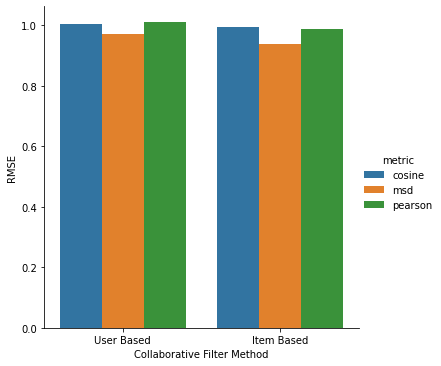

In [ ]:
df = pd.DataFrame(data=dat,columns=['Collaborative Filter Method','metric','RMSE'])
sns.catplot(x='Collaborative Filter Method', y='RMSE', hue='metric', data=df, kind='bar')

The impact of the three metrics on User Based CF is consistent with the impact on Item Based CF.

**Examine how the number of neighbors impacts the performances of User Based Collaborative filtering and Item Based Collaborative Filtering.**

**PLOT YOUR RESULTS**

In [ ]:
import time

ubcf_rmses = []
ubcf_times = []
ibcf_rmses = []
ibcf_times = []

#If time allows, run at 1000 neighbors
for k in range(1, 100):
  print("Now looking at ", k, " neighbors")
  ubcf_options = {
      'user_based': True
  }
  ibcf_options = {
      'user_based': False
  }

  ubcf_rmse = 0
  ibcf_rmse = 0
  ubcf_time = 0
  ibcf_time = 0

  for j in range(0,2):
    start = time.time()
    if j == 0:
      algo = KNNBasic(k=k,sim_options=ubcf_options)
    else:
      algo = KNNBasic(k=k,sim_options=ibcf_options)
    trainset, testset = split.train_test_split(data, test_size=0.3)
    predictions = algo.fit(trainset).test(testset)
    end = time.time()

    if j == 0:
      ubcf_rmse = accuracy.rmse(predictions)
      ubcf_time = end-start
    else:
      ibcf_rmse = accuracy.rmse(predictions)
      ibcf_time = end-start

  ubcf_rmses.append([k,ubcf_rmse])
  ubcf_times.append([k,ubcf_time])
  ibcf_rmses.append([k,ibcf_rmse])
  ibcf_times.append([k,ibcf_time])

Now looking at  1  neighbors
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2284
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.3097
Now looking at  2  neighbors
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0891
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1395
Now looking at  3  neighbors
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0302
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0722
Now looking at  4  neighbors
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0133
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0412
Now looking at  5  neighbors
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9954
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.

28


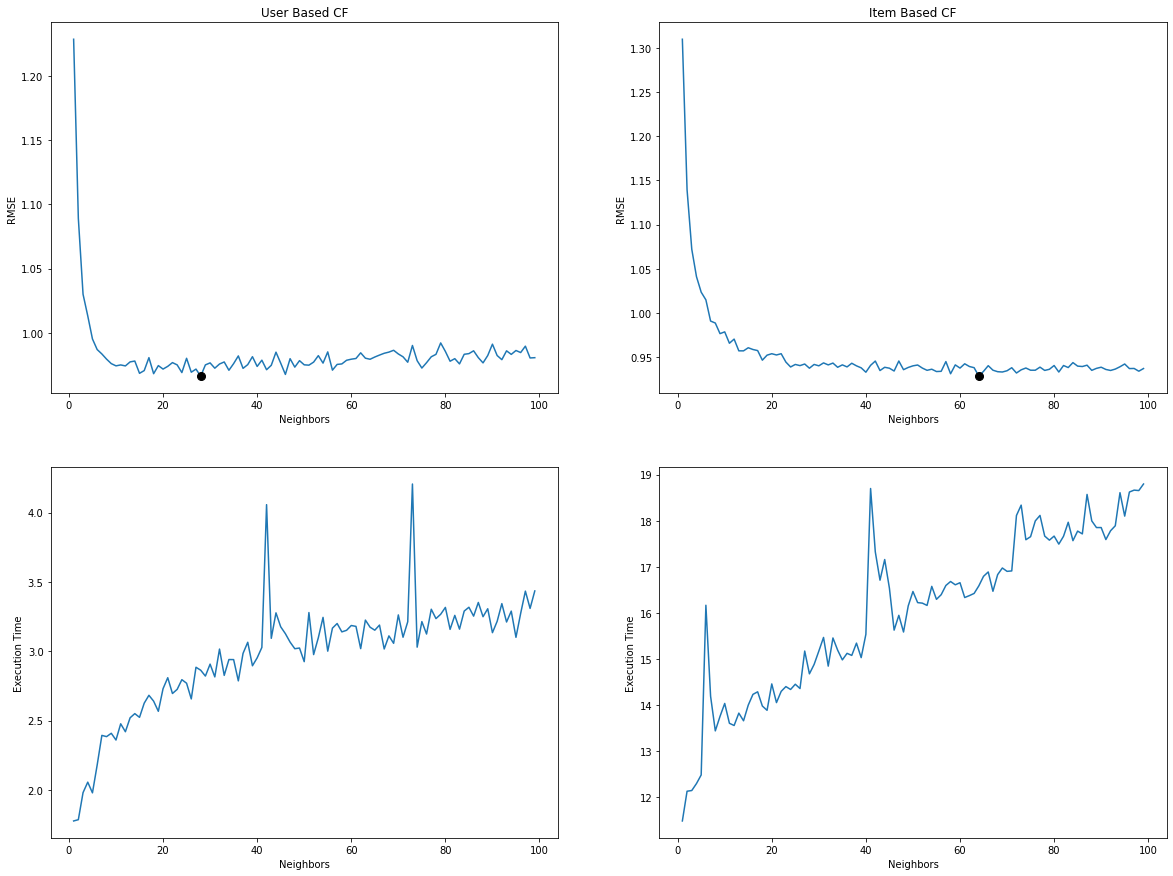

In [ ]:
f,axes = plt.subplots(2,2,figsize=(20,15))
df = pd.DataFrame(data=ubcf_rmses,columns=['Neighbors','RMSE'])
sns.lineplot(x='Neighbors',y='RMSE',data=df, ax=axes[0][0])
axes[0][0].title.set_text('User Based CF')
axes[0][0].plot(df[['RMSE']].idxmin().values[0]+1,df['RMSE'].min(),color='black',marker='o',markersize=8)

print(df[['RMSE']].idxmin().values[0]+1)

df = pd.DataFrame(data=ubcf_times,columns=['Neighbors','Execution Time'])
sns.lineplot(x='Neighbors',y='Execution Time',data=df,ax=axes[1][0])

df = pd.DataFrame(data=ibcf_rmses,columns=['Neighbors','RMSE'])
sns.lineplot(x='Neighbors',y='RMSE',data=df, ax=axes[0][1])
axes[0][1].title.set_text('Item Based CF')
axes[0][1].plot(df[['RMSE']].idxmin().values[0]+1,df['RMSE'].min(),color='black',marker='o',markersize=8)

df = pd.DataFrame(data=ibcf_times,columns=['Neighbors','Execution Time'])
sns.lineplot(x='Neighbors',y='Execution Time',data=df,ax=axes[1][1])
plt.show()

**Identify the best number of neighbors (denoted by K) for User/Item Based Collaborative Filtering in terms of RMSE. Is the best K of User Based Collaborative Filtering the best K of Item Based Collaborative Filtering?**

In [ ]:
df = pd.DataFrame(data=ubcf_rmses,columns=['Neighbors','RMSE'])
print("For User Based CF, the best number of neighbors was {0} with an RMSE of {1}".format(df[['RMSE']].idxmin().values[0]+1,df['RMSE'].min()))
df = pd.DataFrame(data=ibcf_rmses,columns=['Neighbors','RMSE'])
print("For Item Based CF, the best number of neighbors was {0} with an RMSE of {1}".format(df[['RMSE']].idxmin().values[0]+1,df['RMSE'].min()))

For User Based CF, the best number of neighbors was 28 with an RMSE of 0.9664437990627259
For Item Based CF, the best number of neighbors was 64 with an RMSE of 0.928628864854872


=== END OF CODE ===